In [3]:
"""
Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from
the number of fire in the city of Chicago
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd


DATA_FILE = 'data/fire_theft.xls'


In [4]:
def run():
    # Step 1: read in data from the .xls file
    book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
    sheet = book.sheet_by_index(0)
    data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
    XX, YY = data.T[0], data.T[1]
    n_samples = (sheet.nrows - 1)

    # Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
    X = tf.placeholder(tf.float32, name='X')
    Y = tf.placeholder(tf.float32, name='Y')

    # Step 3: create weight and bias, initialized to 0
    w = tf.Variable(0.0, name='weights')
    b = tf.Variable(0.0, name='bias')

    # Step 4: build model to predict Y
    Y_predicted = (X * w + b)

    # Step 5: use the square error as the loss function
    loss_1 = tf.square((Y - Y_predicted), name='square_loss')
    loss_2 = tf.losses.absolute_difference(Y, Y_predicted)
    loss_3 = tf.losses.huber_loss(Y, Y_predicted)

    # Step 6: using gradient descent with learning rate of 0.01 to minimize loss
    learning_rate = 0.001
    train_count = 100
    optimizer_1 = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss_1)
    optimizer_2 = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss_2)
    optimizer_3 = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss_3)

    init_op = tf.global_variables_initializer();


    session_1 = tf.Session()
    session_1.run(init_op)
    session_2 = tf.Session()
    session_2.run(init_op)
    session_3 = tf.Session()
    session_3.run(init_op)

    writer_1 = tf.summary.FileWriter('./graph/example_03/01', session_1.graph)
    writer_2 = tf.summary.FileWriter('./graph/example_03/02', session_2.graph)
    writer_3 = tf.summary.FileWriter('./graph/example_03/03', session_3.graph)


    print(" ========================== ")
    print(" => n_samples={}".format(n_samples))
    print(" ========================== ")

    for i in range(train_count):
        total_loss = 0

        for x, y in data:
            _, l = session_1.run([optimizer_1, loss_1], feed_dict={X:x, Y:y})
            total_loss += l

        print(" ==> [Square] Epoch {}: w={}, b={}, total_loss={}, ==> {}".format(i, w.eval(session_1), b.eval(session_1), total_loss, (total_loss / n_samples)))

    w_value, b_value = session_1.run([w, b])

    plt.title(" [Square]")
    plt.plot(XX, YY, 'bo', label='Real data')
    plt.plot(XX, XX * w_value + b_value, 'r', label='Predicted data')
    plt.legend()
    plt.show()

    print(" ========================== ")

    for i in range(train_count):
        total_loss = 0

        for x, y in data:
            _, l = session_2.run([optimizer_2, loss_2], feed_dict={X:x, Y:y})
            total_loss += l

        print(" ==> [Abs Diff] Epoch {}: w={}, b={}, total_loss={}, ==> {}".format(i, w.eval(session_2), b.eval(session_2), total_loss, (total_loss / n_samples)))

    w_value, b_value = session_2.run([w, b])

    plt.title(" [Abs Diff]")
    plt.plot(XX, YY, 'bo', label='Real data')
    plt.plot(XX, XX * w_value + b_value, 'r', label='Predicted data')
    plt.legend()
    plt.show()

    print(" ========================== ")

    for i in range(train_count):
        total_loss = 0

        for x, y in data:
            _, l = session_3.run([optimizer_3, loss_3], feed_dict={X:x, Y:y})
            total_loss += l

        print(" ==> [Huber Loss] Epoch {}: w={}, b={}, total_loss={}, ==> {}".format(i, w.eval(session_3), b.eval(session_3), total_loss, (total_loss / n_samples)))

    w_value, b_value = session_3.run([w, b])

    plt.title(" [Huber Loss]")
    plt.xlabel("fire")
    plt.ylabel("theft")
    plt.plot(XX, YY, 'bo', label='Real data')
    plt.plot(XX, XX * w_value + b_value, 'r', label='Predicted data')
    plt.legend()
    plt.show()

    print(" ========================== ")

    writer_1.close()
    writer_2.close()
    writer_3.close()

    session_1.close()
    session_2.close()
    session_3.close()


 => n_samples=42
 ==> [Square] Epoch 0: w=3.0318374633789062, b=0.6330486536026001, total_loss=86924.5472746864, ==> 2069.632077968724
 ==> [Square] Epoch 1: w=2.994328737258911, b=1.0658679008483887, total_loss=88914.52091359184, ==> 2117.0124027045676
 ==> [Square] Epoch 2: w=2.9578163623809814, b=1.4871867895126343, total_loss=87876.71403038502, ==> 2092.302715009167
 ==> [Square] Epoch 3: w=2.922274589538574, b=1.8973091840744019, total_loss=86877.3485879153, ==> 2068.508299712269
 ==> [Square] Epoch 4: w=2.887676954269409, b=2.2965335845947266, total_loss=85914.82103037834, ==> 2045.59097691377
 ==> [Square] Epoch 5: w=2.853998899459839, b=2.6851508617401123, total_loss=84987.61596298218, ==> 2023.51466578529
 ==> [Square] Epoch 6: w=2.8212153911590576, b=3.063441276550293, total_loss=84094.28153574467, ==> 2002.2447984701112
 ==> [Square] Epoch 7: w=2.7893033027648926, b=3.4316787719726562, total_loss=83233.41749683022, ==> 1981.7480356388148
 ==> [Square] Epoch 8: w=2.7582390308

 ==> [Square] Epoch 75: w=1.8075344562530518, b=14.760409355163574, total_loss=60968.22079863027, ==> 1451.6243047292921
 ==> [Square] Epoch 76: w=1.8025583028793335, b=14.817830085754395, total_loss=60876.18230296951, ==> 1449.4329119754645
 ==> [Square] Epoch 77: w=1.7977139949798584, b=14.873726844787598, total_loss=60786.77941463981, ==> 1447.3042717771382
 ==> [Square] Epoch 78: w=1.7929986715316772, b=14.928139686584473, total_loss=60699.94761734462, ==> 1445.2368480320147
 ==> [Square] Epoch 79: w=1.788408637046814, b=14.98110580444336, total_loss=60615.61226139296, ==> 1443.2288633664991
 ==> [Square] Epoch 80: w=1.7839405536651611, b=15.032663345336914, total_loss=60533.695421942975, ==> 1441.2784624272138
 ==> [Square] Epoch 81: w=1.7795910835266113, b=15.082849502563477, total_loss=60454.0910531953, ==> 1439.3831203141738
 ==> [Square] Epoch 82: w=1.7753574848175049, b=15.131702423095703, total_loss=60376.776283217594, ==> 1437.5422924575619
 ==> [Square] Epoch 83: w=1.77123

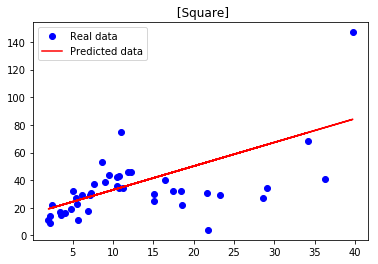

 ==> [Abs Diff] Epoch 0: w=0.4895000457763672, b=0.03999998793005943, total_loss=1290.71515417099, ==> 30.73131319454738
 ==> [Abs Diff] Epoch 1: w=0.9790002107620239, b=0.07999998331069946, total_loss=1049.5048809051514, ==> 24.98821145012265
 ==> [Abs Diff] Epoch 2: w=1.301900029182434, b=0.11400005221366882, total_loss=859.7709040641785, ==> 20.470735811051867
 ==> [Abs Diff] Epoch 3: w=1.5199995040893555, b=0.1440001130104065, total_loss=793.7221431732178, ==> 18.898146266028995
 ==> [Abs Diff] Epoch 4: w=1.6948989629745483, b=0.17200016975402832, total_loss=757.7534122467041, ==> 18.041747910635813
 ==> [Abs Diff] Epoch 5: w=1.8027985095977783, b=0.19600021839141846, total_loss=736.2035074234009, ==> 17.5286549386524
 ==> [Abs Diff] Epoch 6: w=1.875898003578186, b=0.21800026297569275, total_loss=726.3099374771118, ==> 17.293093749455043
 ==> [Abs Diff] Epoch 7: w=1.9375975131988525, b=0.2380003035068512, total_loss=721.1139521598816, ==> 17.169379813330515
 ==> [Abs Diff] Epoch 8:

 ==> [Abs Diff] Epoch 68: w=1.9416617155075073, b=1.2820038795471191, total_loss=699.74001121521, ==> 16.660476457505
 ==> [Abs Diff] Epoch 69: w=1.904961109161377, b=1.2980046272277832, total_loss=697.2657632827759, ==> 16.601565792447044
 ==> [Abs Diff] Epoch 70: w=1.9364606142044067, b=1.3160054683685303, total_loss=699.2918195724487, ==> 16.649805227915447
 ==> [Abs Diff] Epoch 71: w=1.8997600078582764, b=1.3320062160491943, total_loss=696.5308637619019, ==> 16.584068184807187
 ==> [Abs Diff] Epoch 72: w=1.9312595129013062, b=1.3500070571899414, total_loss=698.8436226844788, ==> 16.63913387343997
 ==> [Abs Diff] Epoch 73: w=1.8945589065551758, b=1.3660078048706055, total_loss=695.7959580421448, ==> 16.566570429574874
 ==> [Abs Diff] Epoch 74: w=1.9260584115982056, b=1.3840086460113525, total_loss=698.3954253196716, ==> 16.62846250761123
 ==> [Abs Diff] Epoch 75: w=1.8893578052520752, b=1.4000093936920166, total_loss=695.0610375404358, ==> 16.54907232239133
 ==> [Abs Diff] Epoch 76:

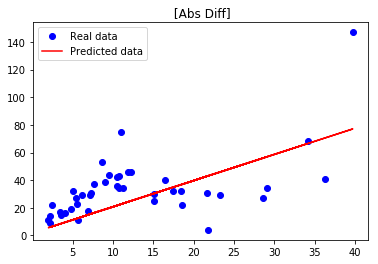

 ==> [Huber Loss] Epoch 0: w=0.4895000457763672, b=0.03999998793005943, total_loss=1269.71515417099, ==> 30.23131319454738
 ==> [Huber Loss] Epoch 1: w=0.9790002107620239, b=0.07999998331069946, total_loss=1028.5048809051514, ==> 24.48821145012265
 ==> [Huber Loss] Epoch 2: w=1.309628963470459, b=0.11443859338760376, total_loss=838.0037485137582, ==> 19.95247020270853
 ==> [Huber Loss] Epoch 3: w=1.502712607383728, b=0.1432805210351944, total_loss=773.4516251031309, ==> 18.41551488340788
 ==> [Huber Loss] Epoch 4: w=1.6718677282333374, b=0.1709001511335373, total_loss=740.2094005644321, ==> 17.624033346772194
 ==> [Huber Loss] Epoch 5: w=1.7794857025146484, b=0.19485078752040863, total_loss=717.7288882434368, ==> 17.088783053415163
 ==> [Huber Loss] Epoch 6: w=1.8734371662139893, b=0.2175874263048172, total_loss=706.7467150390148, ==> 16.827302739024162
 ==> [Huber Loss] Epoch 7: w=1.9284143447875977, b=0.2376091182231903, total_loss=700.4318977892399, ==> 16.676949947362854
 ==> [Hube

 ==> [Huber Loss] Epoch 66: w=1.9147191047668457, b=1.2675714492797852, total_loss=677.879153602873, ==> 16.139979847687453
 ==> [Huber Loss] Epoch 67: w=1.9140875339508057, b=1.2847200632095337, total_loss=677.5863396101922, ==> 16.13300808595696
 ==> [Huber Loss] Epoch 68: w=1.9134567975997925, b=1.301863193511963, total_loss=677.293739213168, ==> 16.126041409837335
 ==> [Huber Loss] Epoch 69: w=1.9128258228302002, b=1.3190007209777832, total_loss=677.0013045494279, ==> 16.119078679748284
 ==> [Huber Loss] Epoch 70: w=1.912195086479187, b=1.3361327648162842, total_loss=676.709115269623, ==> 16.11212179213388
 ==> [Huber Loss] Epoch 71: w=1.9115644693374634, b=1.3532593250274658, total_loss=676.4171360229375, ==> 16.105169905308035
 ==> [Huber Loss] Epoch 72: w=1.9109342098236084, b=1.3703804016113281, total_loss=676.1253721979447, ==> 16.09822314757011
 ==> [Huber Loss] Epoch 73: w=1.9103041887283325, b=1.387495994567871, total_loss=675.8338018288196, ==> 16.091280995924276
 ==> [Hub

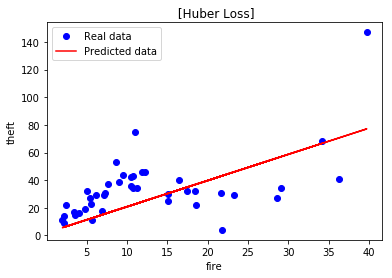

In [5]:
run()